In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Задания 1-2

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#Основные статистики
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3

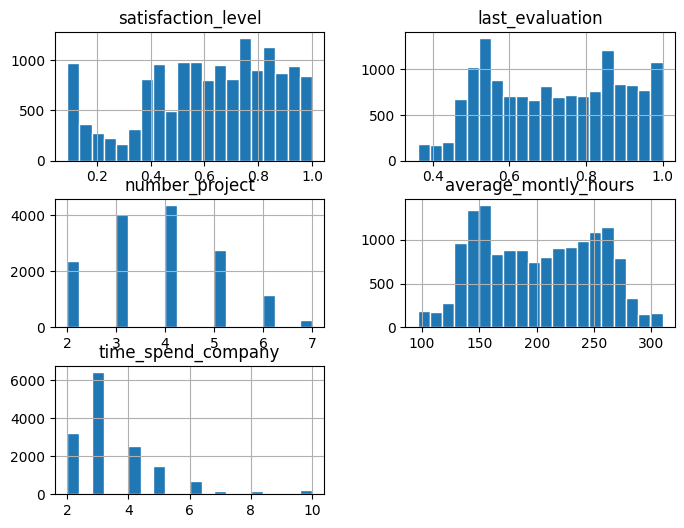

In [8]:
df_num = df.iloc[:,0:5]
df_num.hist(bins=20, figsize=(8, 6), edgecolor='white')
plt.show()

In [9]:
#Большинство признаков не имеет нормального распределения, поэтому мы не можем использовать корреляцию Пирсона

In [10]:
corr_matrix_spearman = df_num.corr(method='spearman')

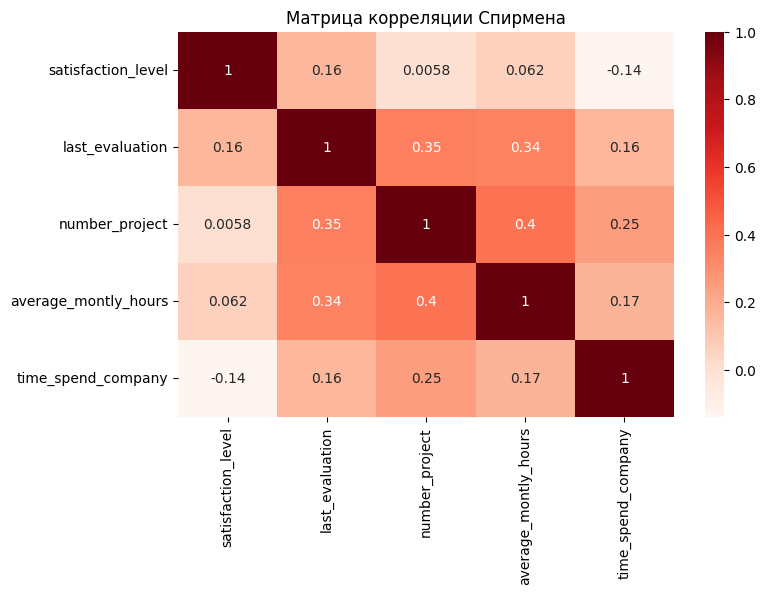

In [11]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap='Reds')
plt.title("Матрица корреляции Спирмена")
plt.show()

В целом корреляционные связи между показателями довольно слабые
Самые скоррелированные показатели: number_project и average_montly_hours,
наименее скоррелированные переменные: satisfaction_level и time_spend_company

### Задание 4

In [14]:
#Посчитаем, сколько сотрудников работает в каждом департаменте
#Уберем из анализа уволенных сотрудников
df_w = df.loc[df.left==0]
df_w.department.value_counts()

department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: count, dtype: int64

### Задание 5-6

In [16]:
#Распределение сотрудников по зарплатам в компании в целом
df_w.salary.value_counts()

salary
low       5144
medium    5129
high      1155
Name: count, dtype: int64

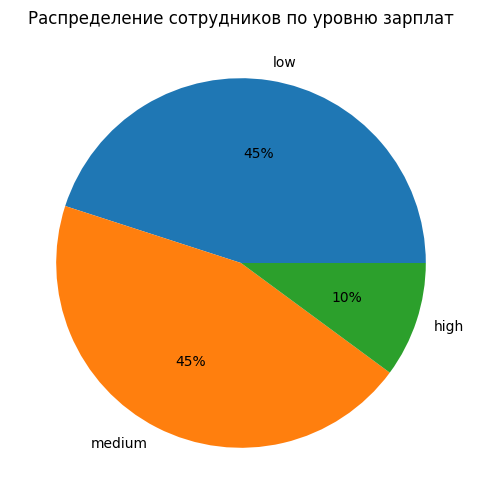

In [17]:
plt.figure(figsize=[6, 6])
data = df_w.salary.value_counts(normalize=True)
labels = ["low", "medium", "high"]
plt.pie(data,labels=labels, autopct='%.0f%%')
plt.title("Распределение сотрудников по уровню зарплат")
plt.show()

In [18]:
#Распределение сотрудников по уровню зарплат внутри департаментов
df_w.pivot_table(index=['department'], columns='salary', values='left', aggfunc='count', margins=True)

salary,high,low,medium,All
department,,,,
IT,79,437,438,954
RandD,47,309,310,666
accounting,69,259,235,563
hr,39,243,242,524
management,224,121,194,539
marketing,71,276,308,655
product_mng,62,346,296,704
sales,255,1402,1469,3126
support,133,757,784,1674


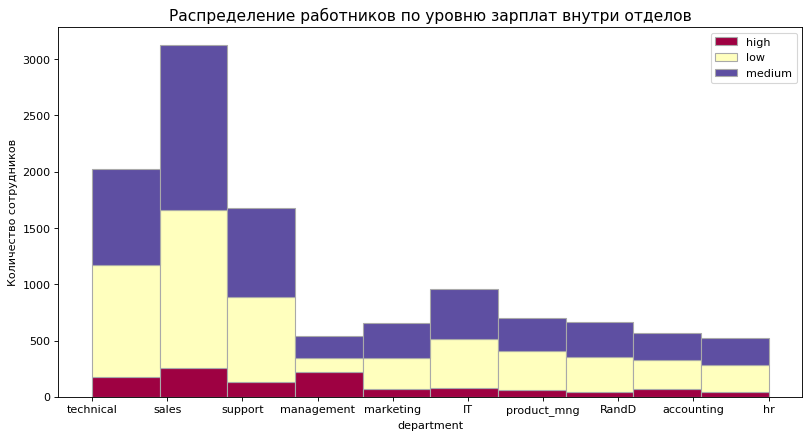

In [19]:
#Визуализируем распределение
x_var = 'department'
groupby_var = 'salary'
df_agg = df_w.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_w[x_var].values.tolist() for i, df_w in df_agg]
plt.figure(figsize=(12,6), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)], edgecolor='darkgray')

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Распределение работников по уровню зарплат внутри отделов", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Количество сотрудников")
plt.show()

# Задание 7

In [21]:
high = df_w[df_w.salary == 'high']['average_montly_hours']
low = df_w[df_w.salary == 'low']['average_montly_hours']

In [22]:
#Проверим выборки на нормальность распределения
def check_normality(data, alpha):
    stat, p = st.normaltest(data)
    print(f'Статистика: {stat:.3f}, p-value={p:.3f}')
    if p > alpha: 
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")
    else:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")

Статистика: 234.981, p-value=0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


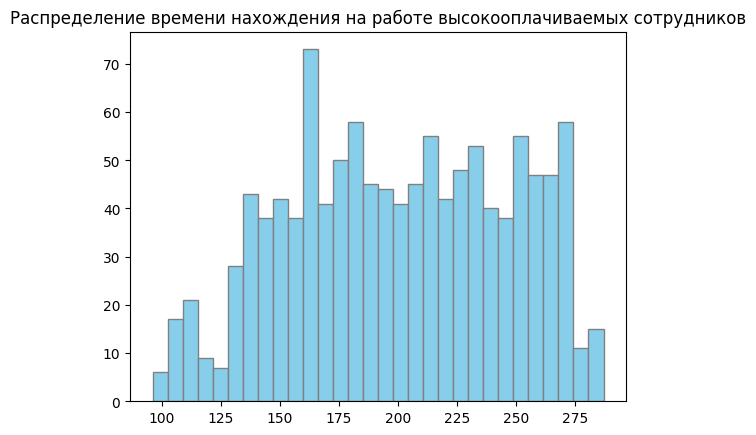

In [23]:
check_normality(high, 0.05)
#Визуализируем распределение для наглядности:
plt.title('Распределение времени нахождения на работе высокооплачиваемых сотрудников')
plt.hist(high, bins=30, color='skyblue', edgecolor='gray')
plt.show()

Статистика: 962.463, p-value=0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


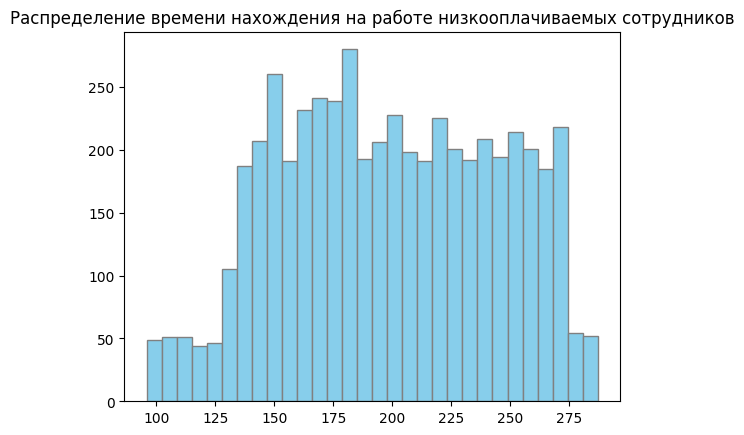

In [24]:
check_normality(low, 0.05)
#Визуализируем распределение для наглядности:
plt.title('Распределение времени нахождения на работе низкооплачиваемых сотрудников')
plt.hist(low, bins=30, color='skyblue', edgecolor='gray')
plt.show()

In [25]:
#Так как данные распределены не нормально, как меру центральной тенденции возьмем медиану
print(f'Медиана среднего количества часов на рабочем месте высокооплачиваемых сотрудников {high.median():.2f}')
print(f'Медиана среднего количества часов на рабочем месте низкооплачиваемых сотрудников {low.median():.2f}')

Медиана среднего количества часов на рабочем месте высокооплачиваемых сотрудников 201.00
Медиана среднего количества часов на рабочем месте низкооплачиваемых сотрудников 197.00


Как мы видим, высокооплачиваемые сотрудники проводят на рабочем месте больше времени, но являются ли отличия статистически значимыми?

In [27]:
#Поскольку данные распределены не нормально, для сравнения используем непараметрический тест Манна-Уитни
#Тест Манна-Уитни
#H0: различия между группами случайны
#H1: различия между группами статистически достоверны
#Зададим уровень значимости alpha
alpha = 0.05
stat, p = st.mannwhitneyu(high, low)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > alpha:
    print('Не отклоняем нулевую гипотезу - различия между группами случайны')
else:
    print('Отклоняем нулевую гипотезу - различия между группами статистически достоверны')

Статистика = 3039300.50000, p = 0.21906
Не отклоняем нулевую гипотезу - различия между группами случайны


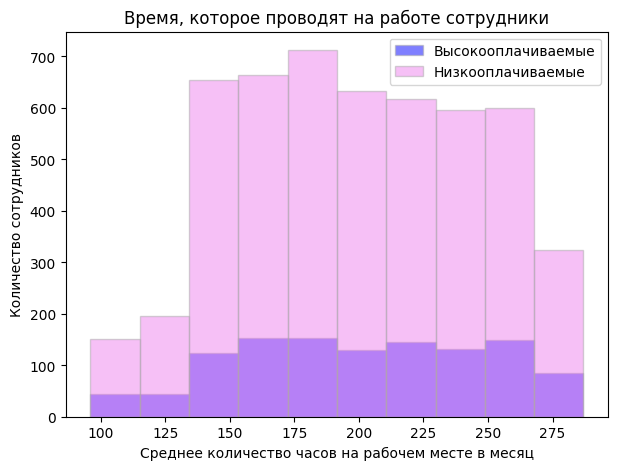

In [28]:
f, ax = plt.subplots(figsize =(7,5))
plt.title('Время, которое проводят на работе сотрудники')
plt.ylabel('Количество сотрудников')
plt.xlabel('Среднее количество часов на рабочем месте в месяц')
plt.hist(high, stacked=True, color='blue', edgecolor='darkgrey', alpha=0.5)
plt.hist(low, stacked=True, color='violet', edgecolor='darkgrey', alpha=0.5)
plt.legend(['Высокооплачиваемые', 'Низкооплачиваемые'])
plt.show()

Вывод: утверждение, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, 
статистически не подтверждено

# Задание 8

In [31]:
#Вариант решения 1
#Выделим работющих и уволенных сотрудников в отдельне датафреймы
df_employed = df[['satisfaction_level', 'number_project', 'promotion_last_5years']][df.left == 0]
df_dismissed = df[['satisfaction_level', 'number_project', 'promotion_last_5years']][df.left == 1]

In [32]:
#доля сотрудников с повышением за последние 5 лет 
part_empl = df_employed.promotion_last_5years.sum()/df_employed.promotion_last_5years.count()*100
print(f'Доля сотрудников с повышением за последние 5 лет среди работающих сотрудников составила {part_empl :.2f}%')

Доля сотрудников с повышением за последние 5 лет среди работающих сотрудников составила 2.63%


In [33]:
part_dism = df_dismissed.promotion_last_5years.sum()/df_dismissed.promotion_last_5years.count()*100
print(f'Доля сотрудников с повышением за последние 5 лет среди уволенных сотрудников составила {part_dism :.2f}%')

Доля сотрудников с повышением за последние 5 лет среди уволенных сотрудников составила 0.53%


In [34]:
#Средняя степень удовлетворенности
satisf_emp = df_employed.satisfaction_level.mean()
print(f'Средняя степень удовлетворенности работающих сотрудников составила {satisf_emp :.2f}')

Средняя степень удовлетворенности работающих сотрудников составила 0.67


In [35]:
satisf_dism = df_dismissed.satisfaction_level.mean()
print(f'Средняя степень удовлетворенности уволенных сотрудников составила {satisf_dism :.2f}')

Средняя степень удовлетворенности уволенных сотрудников составила 0.44


In [36]:
#Среднее количество проектов
proj_emp = df_employed.number_project.mean()
print(f'Среднее количество проектов работающих сотрудников {proj_emp :.2f}')

Среднее количество проектов работающих сотрудников 3.79


In [37]:
proj_dism = df_dismissed.number_project.mean()
print(f'Среднее количество проектов уволенных сотрудников {proj_dism :.2f}')

Среднее количество проектов уволенных сотрудников 3.86


In [38]:
#Вариант решения 2
df_new = df[['satisfaction_level', 'number_project', 'promotion_last_5years', 'left']]

In [39]:
df_new.groupby('left').agg({'promotion_last_5years': lambda x: x.sum()/x.count()*100, 'satisfaction_level': 'mean', 'number_project': 'mean'}).round(2)

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,2.63,0.67,3.79
1,0.53,0.44,3.86


#Задание 9

In [41]:
df_lda = df.iloc[:,0:-2]

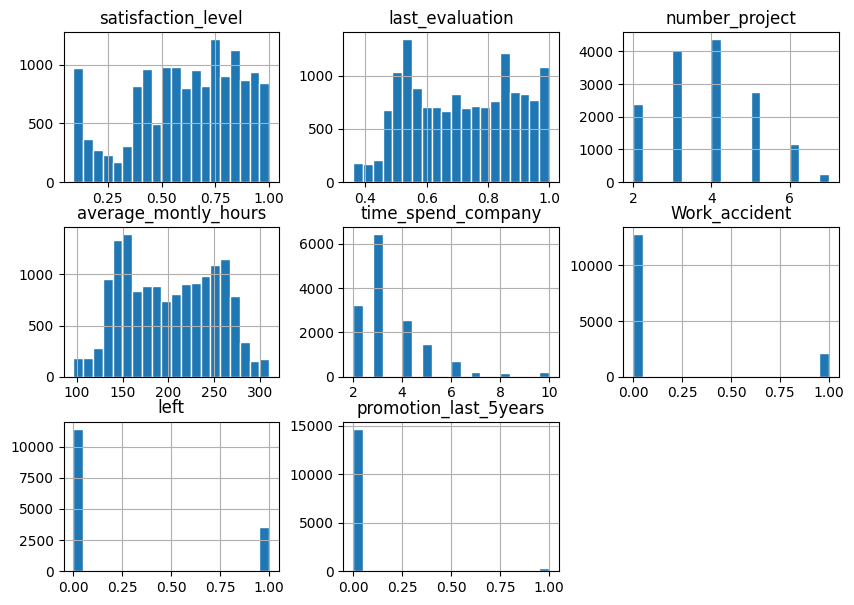

In [42]:
#Визуализируем распределение данных с помощью гистограмм
df_lda.hist(bins=20, figsize=(10, 7), edgecolor='white')
plt.show()

Все показатели распределены не нормально, но для LDA нормальность распределения не критична

In [44]:
#Рассчитаем дисперсию признаков
print(df.var(numeric_only = True))

satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64


Дисперсия неоднородна, поэтому применим нормализацю признаков

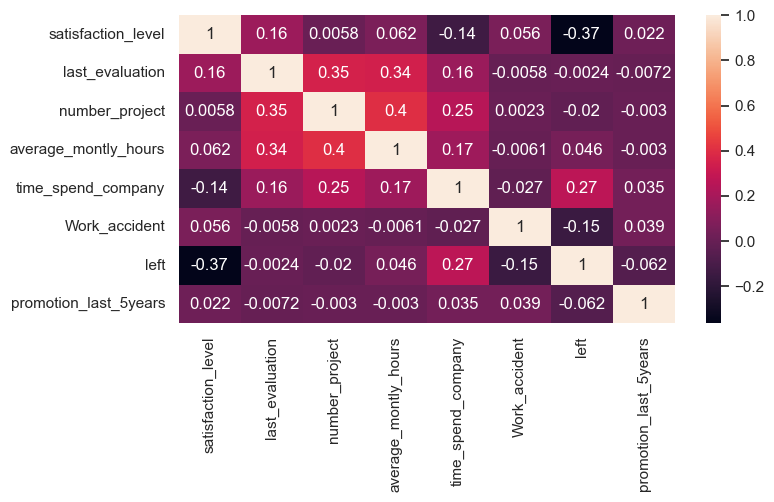

In [46]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df_lda.corr(method='spearman'), annot=True)
plt.show()

Корреляция между признаками умеренная и слабая, что позволяет применить LDA

In [48]:
data = df.iloc[:,0:-2]
data_class = df['left'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [50]:
#Нормализуем данные
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
3745,0,0
3746,1,1
3747,0,0
3748,0,0


In [53]:
#Проверим accuracy работы модели
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, lda.predict(X_test)), 2)

1.0

In [54]:
#Проверим точность модели другим методом
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

1.0


In [55]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-1.09086103e+00,  1.63617926e-01, -1.61605589e-01,
         2.68265007e-01,  5.76402846e-02, -7.80508126e-01,
         1.18940665e+27, -1.58621496e-01]])

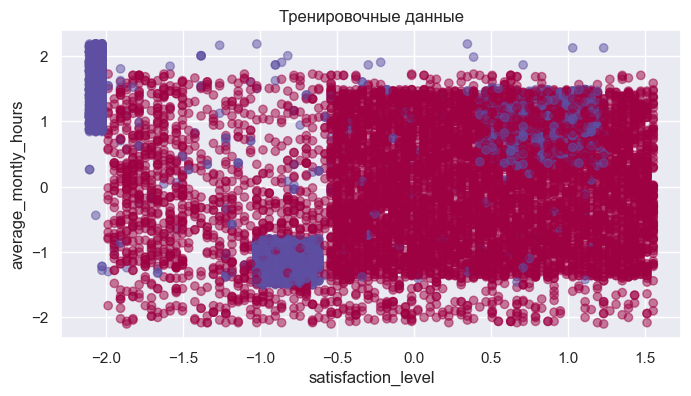

In [56]:
#Визуализируем результаты работы модели на двух признаках: 
#уровень удовлетворенности работой и среднее количество времени, проведенного на рабоем месте в месяц
plt.title('Тренировочные данные')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.scatter(x=X_train[:,0], y=X_train[:,3], c=y_train, cmap="Spectral", alpha=0.5)
plt.show()

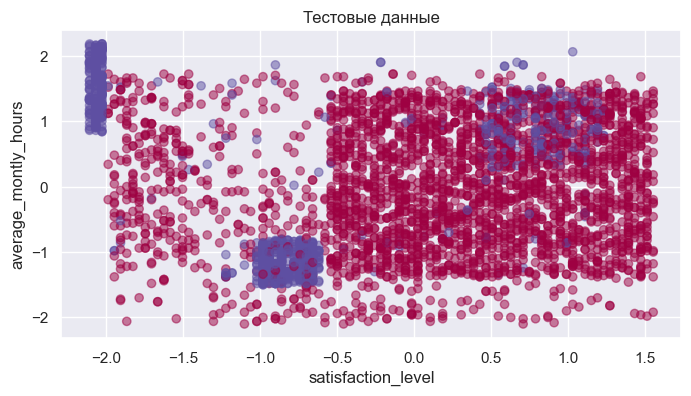

In [57]:
plt.title('Тестовые данные')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.scatter(x=X_test[:,0], y=X_test[:,3], c=y_test, cmap="Spectral", alpha=0.5)
plt.show()

In [58]:
Несмотря на то, что признаки распределены ненормально, модель получилась достаточно точной, что подтверждает и график распределения

SyntaxError: invalid syntax (2350628156.py, line 1)